In [6]:
import numpy as onp 
import pandas as pd

import networkx as nx
from ns.topos.fattree import build as build_fattree

import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, Animation

from IPython.core.display import HTML

from inference import run_simulation
from plotting import plot_egress_histogram

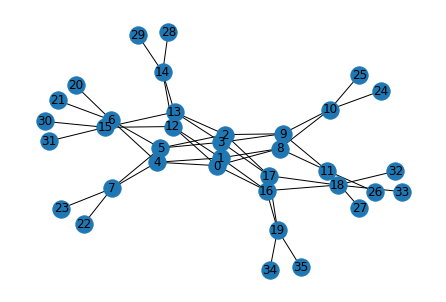

In [7]:
# Setup the trace path, config path, and model path
trace_path = '../data/rsim'
config_path = '../configs/train_no_bidir_ALL_poisson_4.json'
model_path = '../models/models_may/new_no_bidir_sch_ALL-tgen_Poisson-n_flows_100-n_ports_4_lr_0.001_steps_42/best_model.pt'
G = build_fattree(4)
nx.draw(G, with_labels=True)

In [8]:
# Run inference with a trained model.
df = run_simulation(G, trace_path, config_path, model_path)

Simulation Setup, running IRSA


-0.0005892322852787402 0.0007111811864888296
-0.0002915859513450414 0.0007759420259390026
-0.0005179058789508417 0.0007523314270656556


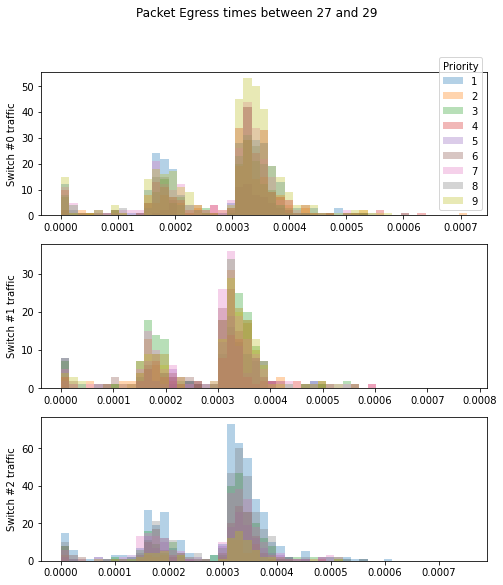

In [ ]:
devices = [0, 1, 2]
df_ = df.dropna(axis=0)
anim = plot_egress_histogram(df_, devices)
HTML(Animation.to_jshtml(anim, fps=4))
anim.save('example_trace_pred.gif')

1.3732910155994649e-06 0.00113677978515625
9.155273446026513e-07 0.0009532428728213915
0.0 0.0016736614876933231


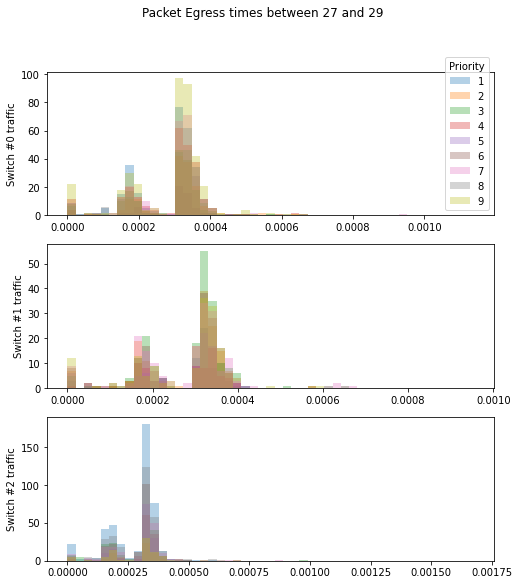

In [ ]:
df_true = pd.read_csv(f'{trace_path}.csv')
anim = plot_egress_histogram(df_true, devices)
HTML(Animation.to_jshtml(anim, fps=4))
anim.save('example_trace_true.gif')